# Basic classification: Classify images of clothing

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
# Load Fashion MNIST dataset
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [3]:
class_names = [
    "T-shirt/top",
    "Trouser",
    "Pullover",
    "Dress",
    "Coat",
    "Sandal",
    "Shirt",
    "Sneaker",
    "Bag",
    "Ankle boot",
]

In [4]:
train_labels.shape

(60000,)

## Data preprocessing

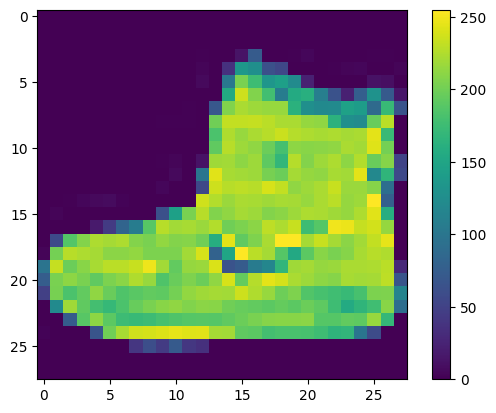

In [5]:
# View image
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

### Image Normalization

In [6]:
train_images = train_images / 255.0
test_images = test_images / 255.0

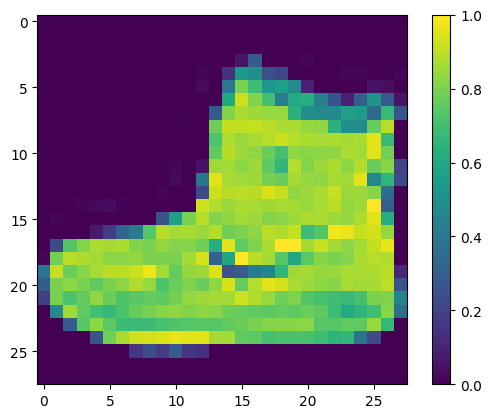

In [7]:
# View image
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

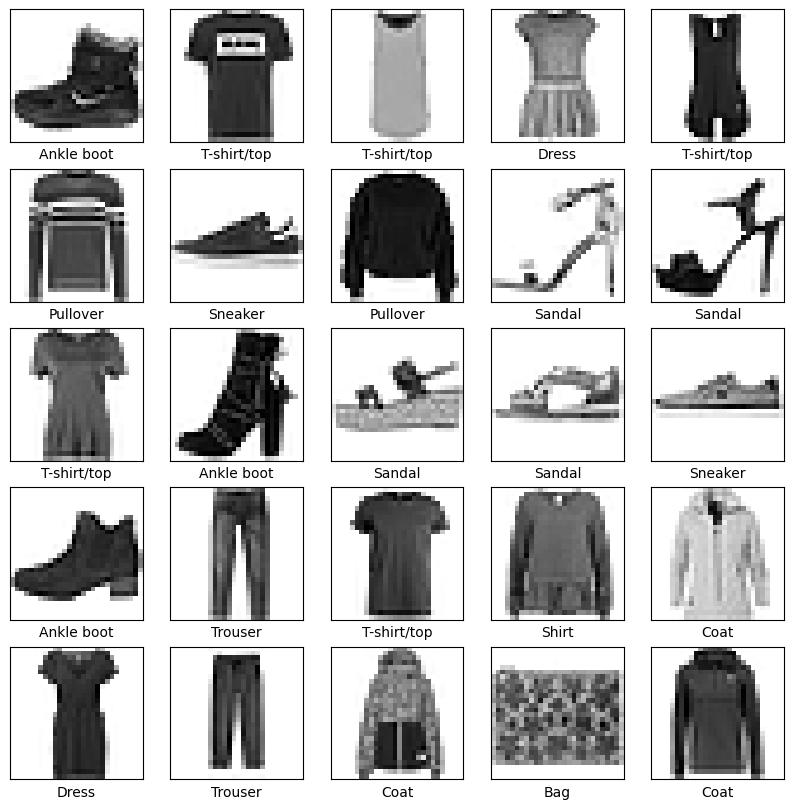

In [8]:
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

### Build and train model

In [9]:
# One-hot encode labels
train_labels_coded = tf.keras.utils.to_categorical(train_labels, 10)
test_labels_coded = tf.keras.utils.to_categorical(test_labels, 10)

# Build the model
inp = tf.keras.layers.Input(shape=(28, 28))
x = tf.keras.layers.Flatten()(inp)
x = tf.keras.layers.Dense(128, activation="relu")(x)
# x = tf.keras.layers.Dense(128, activation='relu')(x)
out = tf.keras.layers.Dense(10, activation="softmax")(x)

# Define the model
model = tf.keras.Model(inp, out)

# Compile the model
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["acc"])

# Print model summary
model.summary()

# Train model
history = model.fit(
    train_images,
    train_labels_coded,
    batch_size=16,
    validation_split=0.2,
    verbose=1,
    epochs=50,
)

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 28, 28)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - acc: 0.7799 - loss: 0.6364 - val_acc: 0.8348 - val_loss: 0.4617
Epoch 2/50
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - acc: 0.8587 - loss: 0.3895 - val_acc: 0.8575 - val_loss: 0.3920
Epoch 3/50
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - acc: 0.8728 - loss: 0.3455 - val_acc: 0.8669 - val_loss: 0.3769
Epoch 4/50
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - acc: 0.8850 - loss: 0.3143 - val_acc: 0.8658 - val_loss: 0.3719
Epoch 5/50
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - acc: 0.8921 - loss: 0.2934 - val_acc: 0.8817 - val_loss: 0.3319
Epoch 6/50
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - acc: 0.8935 - loss: 0.2836 - val_acc: 0.8792 - val_loss: 0.3333
Epoch 7/50
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - acc: 0.8998 - loss: 0.2634 - val_acc: 0.8785 - val_loss: 0.3307
Epoch 8/50
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - acc: 0.9063 - loss: 0.2509 - val_acc: 0.8817 - val_loss: 0.3342
Epoch 9/50
3000/3000 ━━━━━━━━━━━━━━━━━━━

In [10]:
hist = pd.DataFrame(history.history)
hist.tail()

,acc,loss,val_acc,val_loss
45,0.961521,0.104990,0.888500,0.528935
46,0.962396,0.103811,0.889750,0.507693
47,0.961187,0.102973,0.887167,0.533997
48,0.962229,0.098952,0.885917,0.547910
49,0.963521,0.098059,0.887667,0.529774


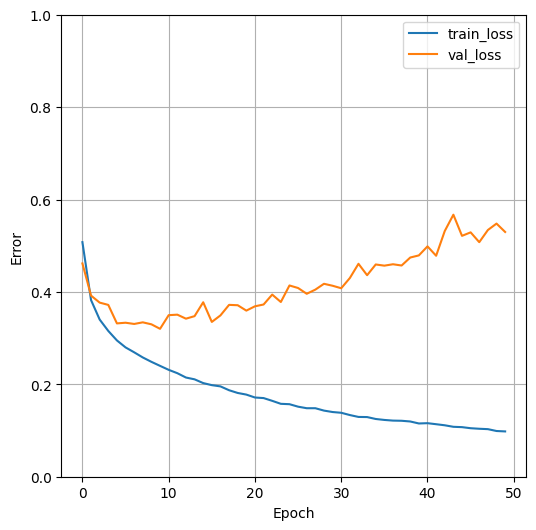

In [11]:
plt.figure(figsize=(6, 6))
plt.plot(hist.loss, label="train_loss")
plt.plot(hist.val_loss, label="val_loss")
plt.ylim([0, 1])
plt.ylabel("Error")
plt.xlabel("Epoch")
plt.grid(True)
plt.legend()
plt.show()

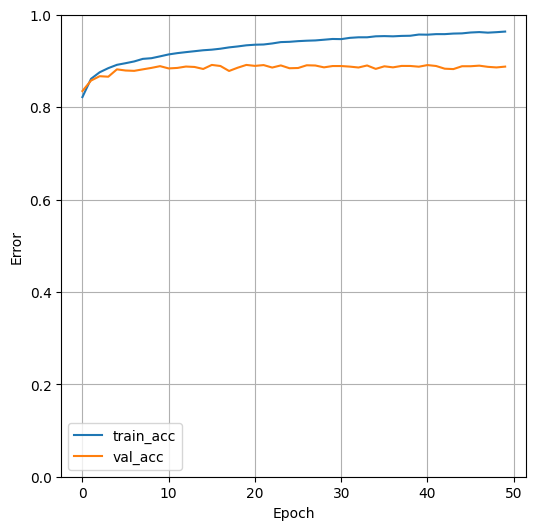

In [12]:
plt.figure(figsize=(6, 6))
plt.plot(hist.acc, label="train_acc")
plt.plot(hist.val_acc, label="val_acc")
plt.ylim([0, 1])
plt.ylabel("Error")
plt.xlabel("Epoch")
plt.grid(True)
plt.legend()
plt.show()

### Making predicitions

In [13]:
predictions = model.predict(test_images)
predictions[0]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 519us/step


array([1.16268337e-20, 1.05640116e-26, 2.74799031e-25, 2.55637664e-21,
       3.60442183e-29, 5.19503329e-10, 4.06921615e-20, 8.17910632e-07,
       6.60962142e-22, 9.99999166e-01], dtype=float32)

In [14]:
np.argmax(predictions[0])

np.int64(9)

In [15]:
test_labels[0]

np.uint8(9)

In [16]:
def plot_image(i, predictions_array, true_label, img):
    true_label, img = true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = "blue"
    else:
        color = "red"

    plt.xlabel(
        "{} {:2.0f}% ({})".format(
            class_names[predicted_label],
            100 * np.max(predictions_array),
            class_names[true_label],
        ),
        color=color,
    )


def plot_value_array(i, predictions_array, true_label):
    true_label = true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color("red")
    thisplot[true_label].set_color("blue")

5182


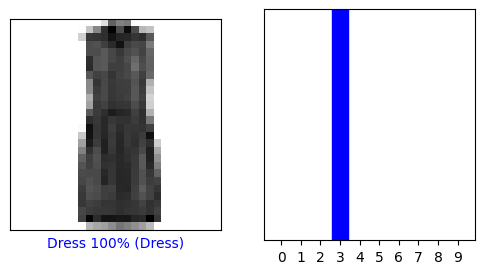

In [17]:
i = np.random.randint(1, 6000)
print(i)
plt.figure(figsize=(6, 3))
plt.subplot(1, 2, 1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1, 2, 2)
plot_value_array(i, predictions[i], test_labels)
plt.show()

In [18]:
predictions[4416]

array([1.5136824e-03, 6.6471142e-07, 9.1031444e-01, 1.1300099e-09,
       2.7047325e-02, 9.0100643e-14, 6.1123047e-02, 1.3879244e-10,
       8.5751719e-07, 3.9750290e-11], dtype=float32)

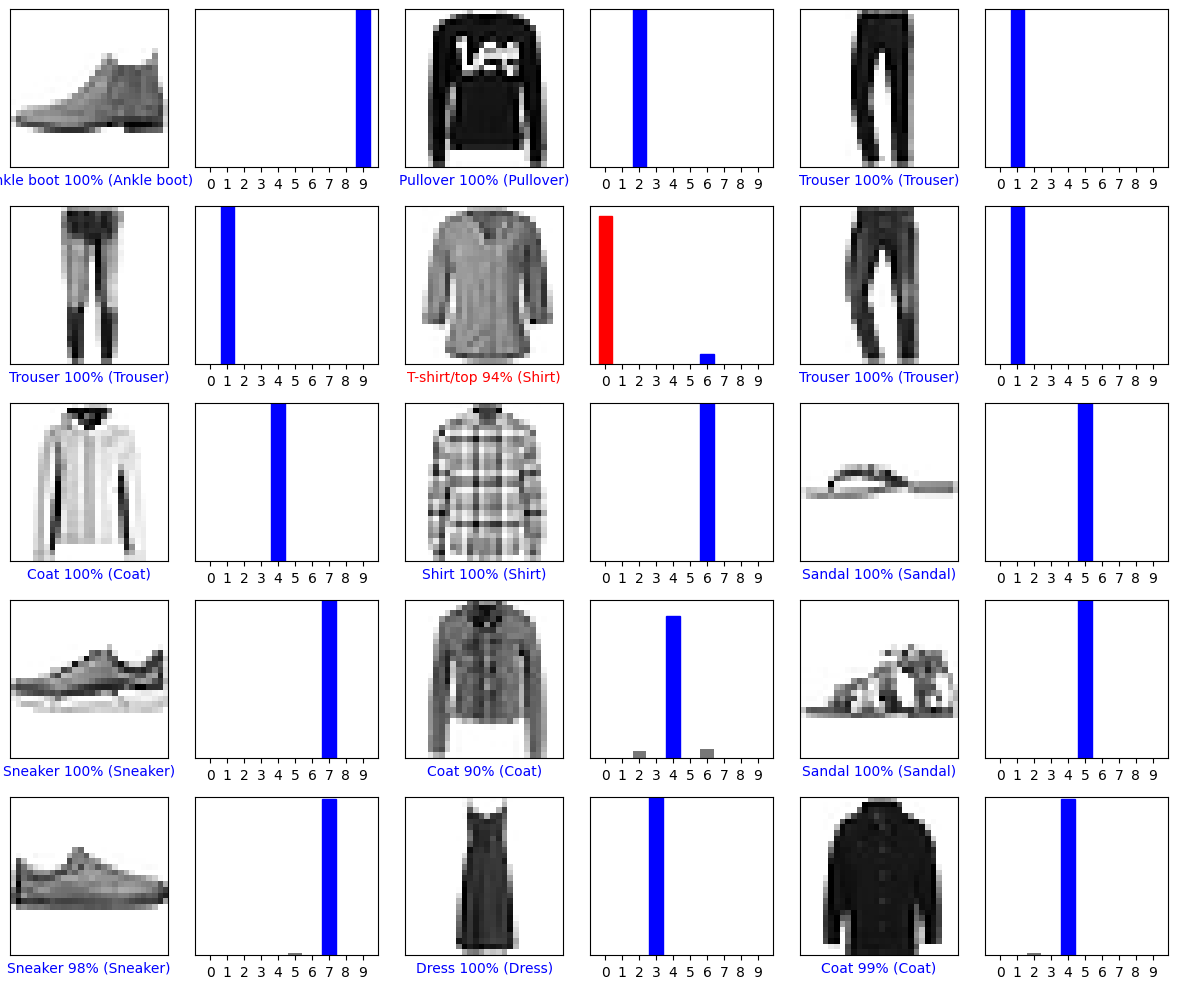

In [19]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows * num_cols
plt.figure(figsize=(2 * 2 * num_cols, 2 * num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2 * num_cols, 2 * i + 1)
    plot_image(i, predictions[i], test_labels, test_images)
    plt.subplot(num_rows, 2 * num_cols, 2 * i + 2)
    plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

### Use the trained model

In [20]:
img = test_images[1]
print(img.shape)

(28, 28)


In [21]:
img = np.expand_dims(img, 0)

print(img.shape)

(1, 28, 28)


In [22]:
predictions_single = model.predict(img)
print(predictions_single)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
[[3.9140303e-07 7.9501634e-22 9.9999964e-01 5.6239669e-26 3.7362686e-09
  8.7672818e-32 8.1231022e-09 0.0000000e+00 2.7958113e-21 0.0000000e+00]]


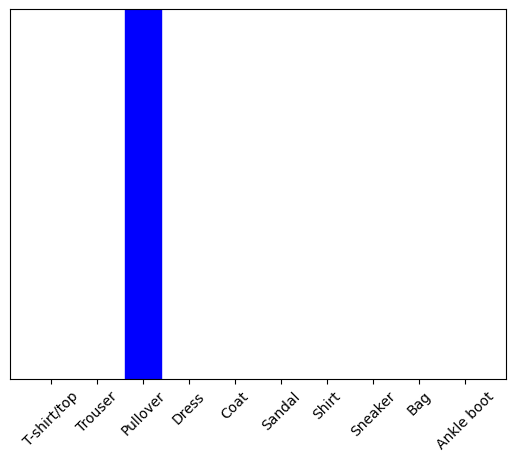

In [23]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)
plt.show()

In [24]:
np.argmax(predictions_single[0])

np.int64(2)